## Intro to qiskit - An SDK(software dev. kit)
- TERRA 
    - Building and optimizing circuits.
    - Executes on devices
- AER ( the simulator which executes our circuits for verifications)
    - High- performance simulators
- IGNIS 
    - Noise verification, mitigation and validation
- AQUA
    - Quantum applications and algorithms

- Note :
    - Simulators can only simulate upto 50 qubits as the memory space goes to the order of 2^50 and thus it is going to be very computationally expensive

In [78]:
%matplotlib inline

from qiskit import *
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_bloch_multivector, plot_histogram 

In [73]:
provider= IBMQ.load_account()

E:\ANACONDA\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


- A specific simulator or a device is called a **backend**
- `execute` takes a quantum circuit or a list of them and `backend` runs the circuit

## PRACTICE
- NEW THING : When you specify the number of shots in the circuit, the **whole state is prepared again, and run on the simulator again** `shots` number of times

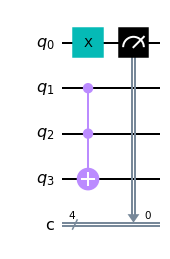

In [5]:
# Making circuits
Q = QuantumCircuit(4,4)
Q.x(0)
Q.ccx(1,2,3)
Q.measure(0,0)
Q.draw(output='mpl')

In [6]:
backend = Aer.get_backend('qasm_simulator')
res = execute(Q,backend).result()
counts = res.get_counts()

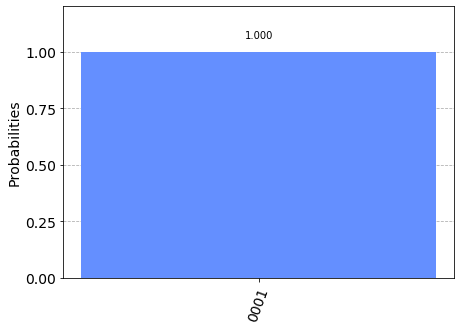

In [13]:
plot_histogram(counts)

- Each unitary gate is its own inverse

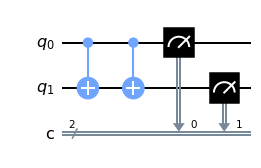

In [21]:
q = QuantumCircuit(2,2)
q.cx(0,1)
q.cx(0,1)
q.measure([0,1],[0,1])
q.draw(output='mpl')

In [22]:
backend = Aer.get_backend('qasm_simulator')
res = execute(q,backend).result()
counts = res.get_counts()

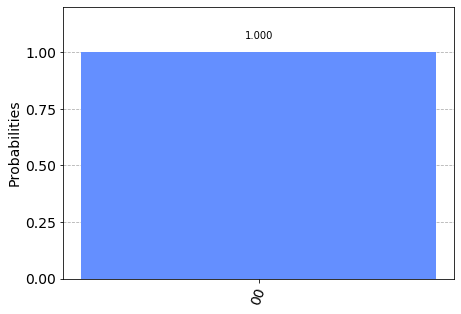

In [23]:
plot_histogram(counts)

## Phase Gates
- **Z gate** : rotation of the state by pi rads anti-clockwise while looking down on the Z axis from above
    $$ Z|0\rangle = |0\rangle$$
    $$ Z|1\rangle = |1\rangle$$

- **S gate** : rotation of the state by pi/2 rads anti-clockwise while looking down on the Z axis from above

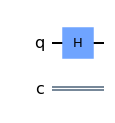

In [64]:
q = QuantumCircuit(1,1)
q.h(0)
q.draw(output='mpl')

In [41]:
backend = Aer.get_backend('statevector_simulator')

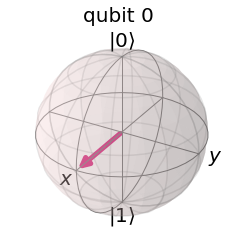

In [56]:
state = execute(q,backend).result().get_statevector()
plot_bloch_multivector(state)

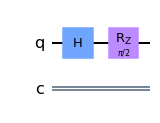

In [65]:
q.rz(np.pi/2,0)
# q.t(0).
q.draw(output='mpl')

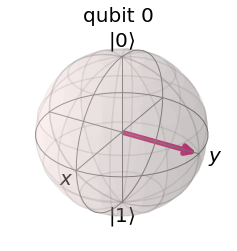

In [63]:
# this confirms that we just rotated our qubit by 90 degrees anti clockwise with 
# the Z gate as the axis of rotation
state = execute(q,backend).result().get_statevector()
plot_bloch_multivector(state)

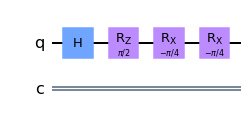

In [68]:
# now rotate by pi/4 with X axis as rotation axis 
q.rx(-np.pi/4,0) # - means clockwise rotation
q.draw(output='mpl')

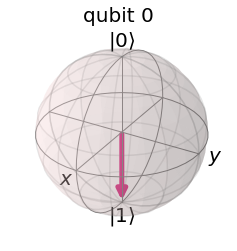

In [69]:
state = execute(q,backend).result().get_statevector()
plot_bloch_multivector(state)

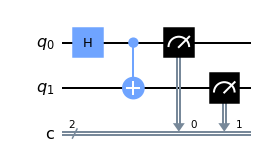

In [70]:
# executing bell state on real quantum computers 
q = QuantumCircuit(2,2)
q.h(0)
q.cx(0,1)
q.measure([0,1],[0,1])
q.draw(output='mpl')

- See which backends you have

In [74]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [82]:
backend = provider.get_backend('ibmqx2')

In [83]:
job = execute(q,backend,shots = 4000)
job_monitor(job)

Job Status: job has successfully run


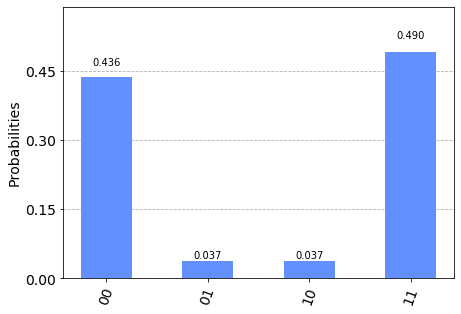

In [84]:
counts = job.result().get_counts()
plot_histogram(counts)